In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
file= "alldata.csv"

In [2]:
df = pd.read_csv(file)

In [3]:
df=df.dropna(how='all')

In [4]:
# droppping reviews column
del df['reviews']
# del df['description']

In [5]:
#sorting out location
df['location2'] = df['location'].str.replace(r'\d+','')
df['location2'] = df['location2'].str.strip()
# df

In [6]:
# running our 'query' through the position column, marking found words as true
try:
  df = df.rename(columns={"positiontxt":"position"})
  df['position'] = df[df['position'].str.contains('data|science|database|analytics|statistician|machine learning|business intelligence',
                                                  flags=re.IGNORECASE, regex=True)]

except AttributeError:
  print("stupid error makes no sense")


# df.count()


In [7]:
df['position']
df = df.dropna(how='any')
# df['position']

In [8]:
# # adding a new column using our 'query' name as the new position title
# df.loc[df.positiontxt.str.contains('analytics', case=False), 'broadpos'] = 'Analyst'
# df.loc[df.positiontxt.str.contains('statistician', case=False), 'broadpos'] = 'Statistician'
# df.loc[df.positiontxt.str.contains('machine learning', case=False), 'broadpos'] = 'Machine Learning'
# df.loc[df.positiontxt.str.contains('business intelligence', case=False), 'broadpos'] = 'Business Intelligence'
# df.loc[df.positiontxt.str.contains('science', case=False), 'broadpos'] = 'Science'
# df.loc[df.positiontxt.str.contains('database', case=False), 'broadpos'] = 'database'
# df.loc[df.positiontxt.str.contains('data', case=False), 'broadpos'] = 'data'

# df


In [9]:
df['position'].value_counts()

Data Scientist                                                                          351
Senior Data Scientist                                                                    96
Data Engineer                                                                            60
Machine Learning Engineer                                                                56
Lead Data Scientist                                                                      31
Sr. Data Scientist                                                                       28
Principal Data Scientist                                                                 24
Data Analyst                                                                             22
Software Engineer, Machine Learning                                                      13
Machine Learning Scientist                                                               13
Senior Data Engineer                                                            

In [10]:
# descriptionList = df['description'].str.lower().str.split(" |,|/")
# df.description.str.contains(r'python')
# Where are the most data science jobs located?
# Who are the top employers?
# Industries 
df

,position,company,description,location,location2
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303","Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA","Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,"Atlanta, GA 30318","Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,"Atlanta, GA 30338","Atlanta, GA"
12,"Senior Associate, Data Scientist",KPMG,Innovate. Collaborate. Shine. Lighthouse — KPM...,"Atlanta, GA 30338","Atlanta, GA"
14,Business Intelligence Data Science Analyst - S...,Newell Brands,Data Science Analyst– Business Intelligence\nL...,"Atlanta, GA","Atlanta, GA"
15,Data Scientist,Cotiviti,Cotiviti is looking for an industry leading Da...,"Atlanta, GA","Atlanta, GA"
18,Data Scientist,Relus Cloud,DATA SCIENTIST\n\nSUMMARY:\nAs an Amazon Web S...,"Atlanta, GA","Atlanta, GA"
19,Data Scientist,Inspire Brands,This position is critical to understanding dri...,"Atlanta, GA","Atlanta, GA"


In [11]:
# aesthetics cover for our powerpoint presentation

# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# text = df.position.values
# wordcloud = WordCloud(
#     width = 4000,
#     height = 3000,
#     background_color = 'black',
#     stopwords = STOPWORDS).generate(str(text))
# fig = plt.figure(
#     figsize = (40, 30),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.savefig('powerpointcover.png')

([<matplotlib.axis.XTick at 0x28e9df415f8>,
 <a list of 5 Text xticklabel objects>)

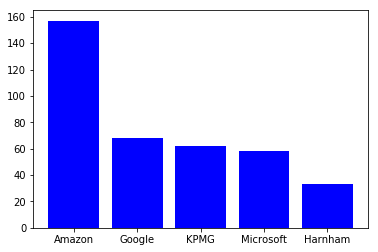

In [38]:
topcompanies=df.groupby(['company']).company.count().nlargest(5)
topcompanies

companies= ['Amazon', 'Google', 'KPMG', 'Microsoft', 'Harnham']
jobcount= [157, 68, 62, 58, 33]
x_axis=np.arange(len(jobcount))

plt.bar(x_axis, jobcount, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, companies)

#this needs more- maybe stacked by position